# Relatório Final - Análise de Séries Temporais de Nascimentos em Portugal
Este notebook apresenta uma análise compreensiva da série temporal de nascimentos em Portugal, abordando todos os aspectos requeridos no projeto.

## Preparação dos Dados
O dataset foi carregado e verificado quanto a dados omissos. As datas foram convertidas para o formato datetime e definidas como índice do DataFrame.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/processed/births_PT_limpo.csv'  # Update with the actual path
births_data = pd.read_csv(file_path)
births_data['Date'] = pd.to_datetime(births_data['Date'])
births_data.set_index('Date', inplace=True)
births_data.head()


,Births
Date,
1901-01-01,15178.0
1901-02-01,15826.0
1901-03-01,14132.0
1901-04-01,16179.0
1901-05-01,15070.0


## Análise Descritiva
A análise descritiva revela as características fundamentais dos dados. Foram geradas estatísticas descritivas e visualizações.

,Births
count,1452.000000
mean,13970.406336
std,3868.502572
min,5719.000000
25%,9913.750000
50%,15313.000000
75%,17052.500000
max,22127.000000


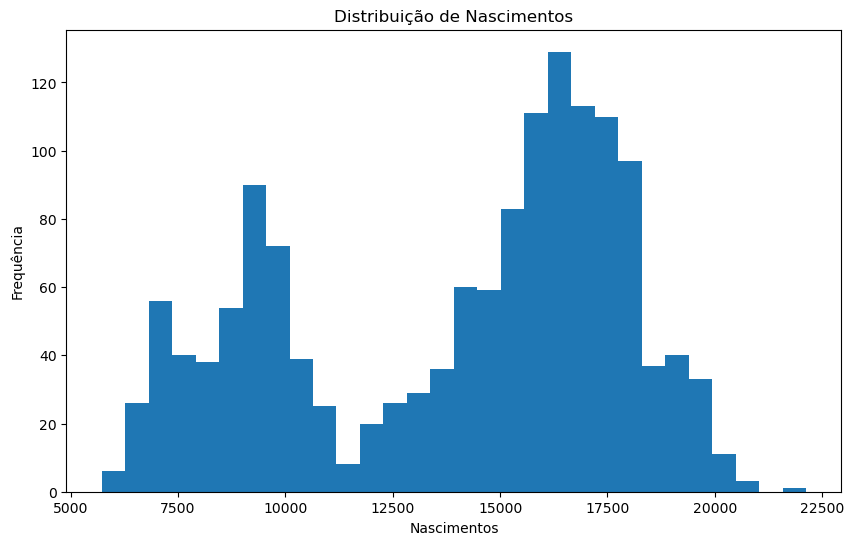

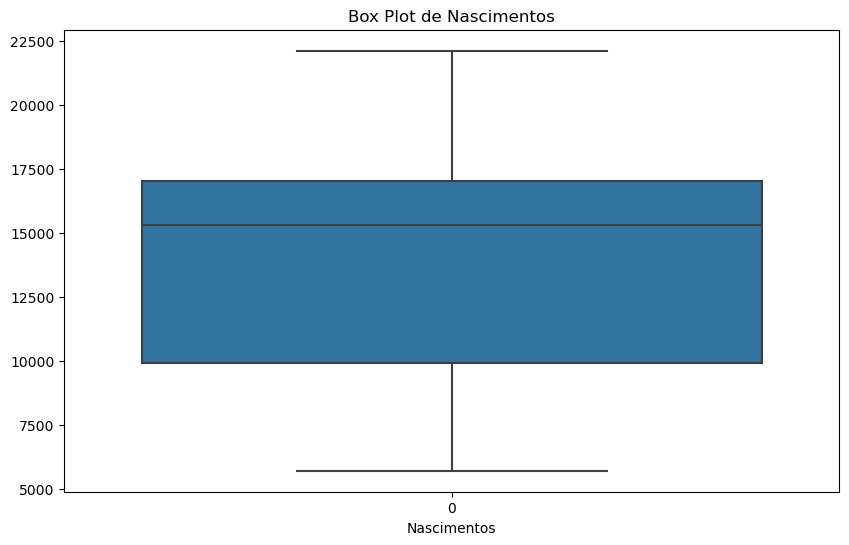

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(births_data.describe())

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(births_data['Births'], bins=30)
plt.title('Distribuição de Nascimentos')
plt.xlabel('Nascimentos')
plt.ylabel('Frequência')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(births_data['Births'])
plt.title('Box Plot de Nascimentos')
plt.xlabel('Nascimentos')
plt.show()


## Visualização Temporal e Correlograma
A série temporal foi visualizada para identificar tendências, sazonalidade e outras características. Além disso, foi realizado um correlograma para analisar a autocorrelação.

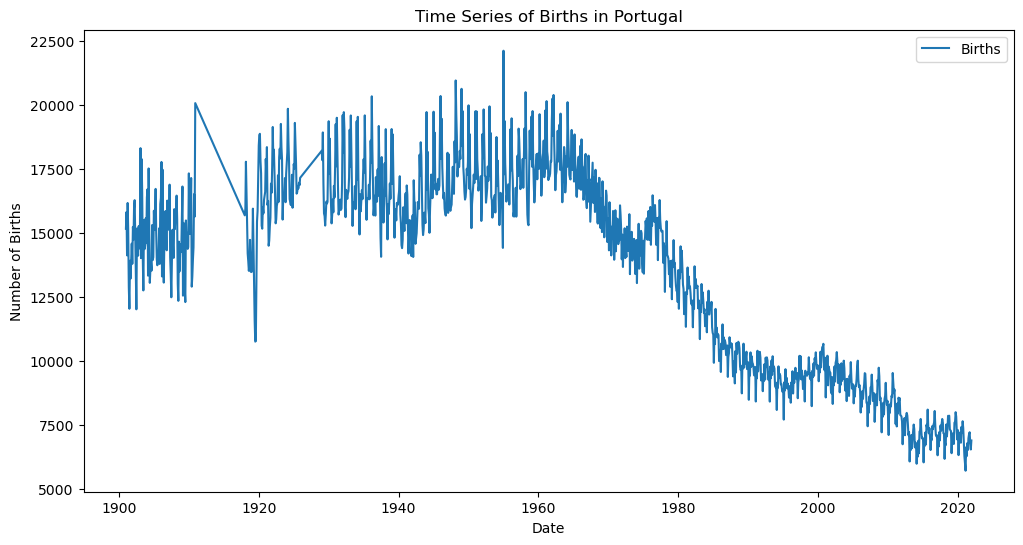

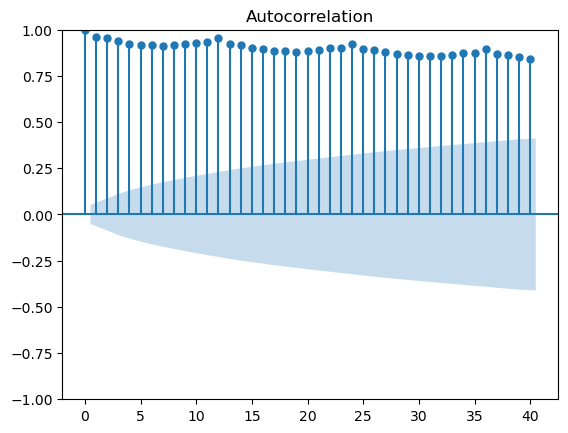

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(births_data['Births'], label='Births')
plt.title('Time Series of Births in Portugal')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

# Correlogram
plot_acf(births_data['Births'].dropna(), lags=40)
plt.show()


## Análise de Estacionariedade
Foi realizada a análise de estacionariedade da série temporal para determinar se as propriedades estatísticas da série se mantêm constantes ao longo do tempo.

In [4]:
from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test
adf_test = adfuller(births_data['Births'].dropna())

# Displaying ADF test results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used Lag': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}
adf_result


{'ADF Statistic': 0.1662670456905947,
 'p-value': 0.9703048705330012,
 'Used Lag': 24,
 'Number of Observations Used': 1427,
 'Critical Values': {'1%': -3.4349408214067227,
  '5%': -2.8635675309927153,
  '10%': -2.5678494453155656}}

## Decomposição Temporal
Foram aplicados métodos de decomposição clássica e STL à série temporal para identificar e separar componentes como tendência, sazonalidade e resíduos.

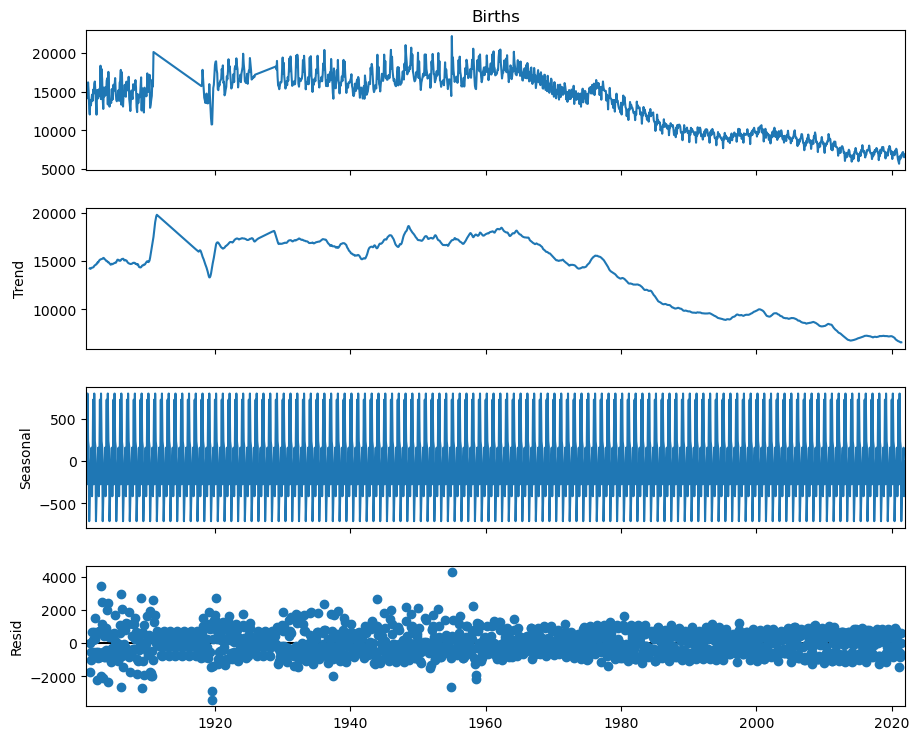

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Classical Decomposition
decompose_classical = seasonal_decompose(births_data['Births'], model='additive', period=12)
fig = decompose_classical.plot()
fig.set_size_inches(10, 8)
plt.show()


## Conclusão
Este relatório forneceu uma análise detalhada da série temporal dos nascimentos em Portugal, abordando diversos aspectos como estacionariedade, sazonalidade e tendência. As conclusões derivadas desta análise são cruciais para a compreensão das dinâmicas temporais dos nascimentos no país.